# Summer Olympics Data Analysis Assignment

In [2]:
import pandas as pd
df = pd.read_csv("summer.csv")
df.isnull().sum()



Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [3]:
df=df.dropna()
print(df.isnull().sum())
print(df.size)

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64
280449


In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [5]:
len(df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [6]:
k=df.groupby(['Sport','Medal']).size()
k=k.reset_index()
k.columns=['Sport','Medal','size']
l=k.loc[k['Medal']=='Gold'].sort_values(by='size',ascending=False).head()
l



,Sport,Medal,size
1,Aquatics,Gold,1421
7,Athletics,Gold,1214
82,Rowing,Gold,890
50,Gymnastics,Gold,820
41,Fencing,Gold,552


<AxesSubplot:xlabel='Sport'>

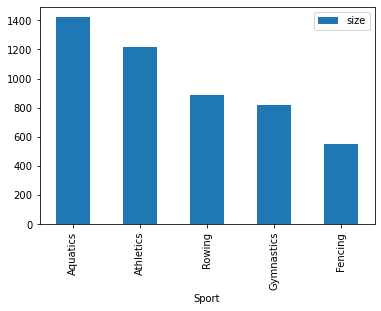

In [7]:
l.plot(x='Sport',y='size',kind='bar')

### 3. Which sport is having most number of medals so far? (Top 5)

In [8]:
p=df.groupby('Sport')['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()
p

,Sport,Medal
0,Aquatics,4170
2,Athletics,3637
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613


<AxesSubplot:xlabel='Sport'>

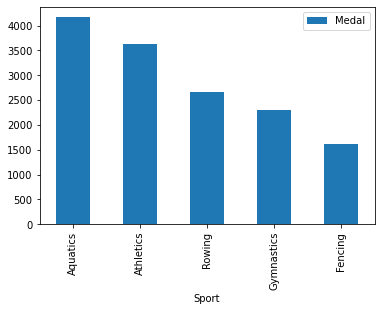

In [9]:
p.plot(x='Sport',y='Medal',kind='bar')

### 4. Which player has won most number of medals? (Top 5)

In [10]:
p=df.groupby('Athlete')['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head()
p

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
14883,"ONO, Takashi",13
18113,"SHAKHLIN, Boris",13


<AxesSubplot:xlabel='Athlete'>

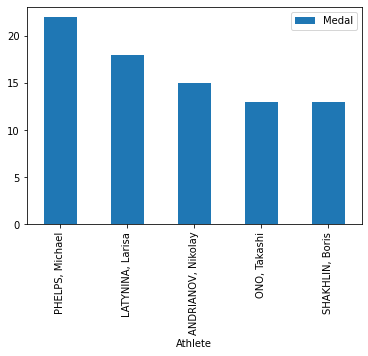

In [11]:
p.plot(x='Athlete',y='Medal',kind='bar')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [12]:
k=df.groupby(['Athlete','Medal']).size()
k=k.reset_index()
k.columns=['Athlete','Medal','size']
l=k.loc[k['Medal']=='Gold'].sort_values(by='size',ascending=False).head()
l

,Athlete,Medal,size
18382,"PHELPS, Michael",Gold,18
13464,"LEWIS, Carl",Gold,9
17059,"NURMI, Paavo",Gold,9
22142,"SPITZ, Mark",Gold,9
13060,"LATYNINA, Larisa",Gold,9


<AxesSubplot:xlabel='Athlete'>

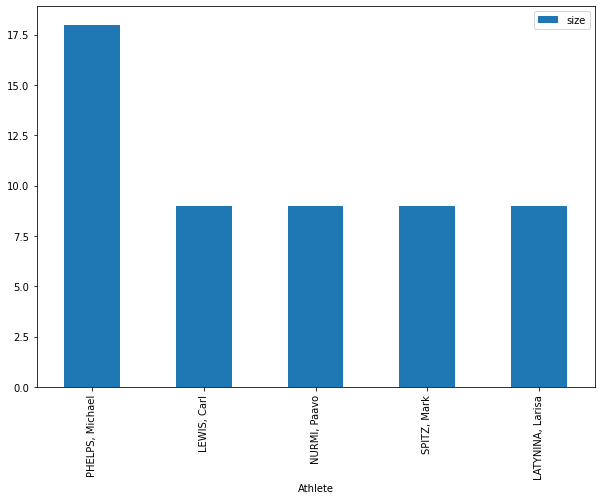

In [13]:
l.plot(x='Athlete',y='size',kind='bar',figsize=(10,7))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [14]:
ndf=df[['Country','Year','Medal']]
ndf=ndf.loc[ndf['Country']=='IND'].sort_values(by='Year').head()
ndf.loc[ndf['Medal']=='Gold'].head(1)

,Country,Year,Medal
5526,IND,1928,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [15]:
d=df.groupby('Event')
d=d.agg({'Athlete':'nunique'}).reset_index().sort_values(by='Athlete',ascending=False).head()
d

,Event,Athlete
477,Football,1357
489,Hockey,1154
614,Team Competition,975
458,Eight With Coxswain (8+),828
403,Basketball,814


<AxesSubplot:xlabel='Event'>

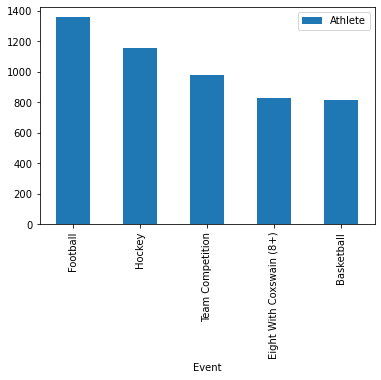

In [17]:
d.plot(x='Event',y='Athlete',kind='bar')

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [18]:
k=df.groupby(['Sport','Gender','Medal']).size()
k=k.reset_index()
k.columns=['Sport','Gender','Medal','size']
l=k.loc[k['Medal']=='Gold'].sort_values(by='size',ascending=False)
l=l.loc[l['Gender']=='Women'].head()
l

,Sport,Gender,Medal,size
4,Aquatics,Women,Gold,589
16,Athletics,Women,Gold,388
92,Gymnastics,Women,Gold,268
139,Rowing,Women,Gold,217
196,Volleyball,Women,Gold,166


<AxesSubplot:xlabel='Sport'>

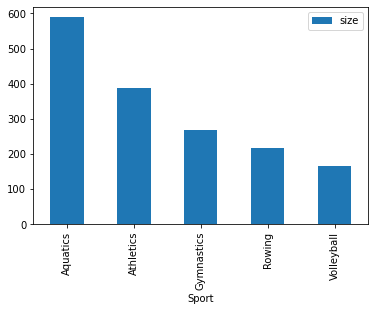

In [19]:
l.plot(x='Sport',y='size',kind='bar')